# Time Series Forecasting Workshop

July 1, 2020  

#### Purpose of Workshop

- improve time series forecasting skills
- share experiences
- join the project team

#### About Data Circles ([datacircles.org](https://datacircles.org))

Data Circles (formerly SeaWiDS) exists to provide a place for women in data science to connect, build community, support each other and grow. In less than two years Data Circles, has grown into a community with more than 1,800 members.   

Teams of volunteers organize monthly events in the Greater Seattle area, including: technical talks, informational panels, career development workshops, hackathons, conferences, networking events, book clubs, mentoring, study sessions, and interview prep.  

Likewise, Victoria is a member of the Data Circles Project Circle, and the Projects Circle is organizing the Traffic Collision Analysis project described below.  

[Victoria Martin](https://www.linkedin.com/in/victoriacmartin1/) is an internet of things (IoT) data scientist with Genie Industries in Redmond, WA. She has a long background in prognostics and health management of IoT devices for both industrial and medical applications. Prior to her career in data science, Victoria received a BS in Nuclear Engineering and an MS in Business Analytics, both from the University of Tennessee in Knoxville.  

The workshop materials *will eventually* be available in the Data Circles [GitHub repository](https://github.com/datacircles).  

## 1. Introduction to the project

Traffic collisions continue to be a serious problem in Seattle. According to the [annual collision report for 2015](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf) released by the Washington State Dept. of Transportation (WSDOT), there were 117,053 collisions and approximately 59.7 billion miles driven. In 2015, there were  

* 5,576,586 Licensed drivers  
* 6,252,554 Registered vehicles  
* 416,699 Speeding citations  
* 33,697 Cell phone and texting citations   

In that same year:  

* Fridays had the most collisions 
* December had the most crashes (on average, 401 per day)
* Driver inattention or distraction was the most frequent contributing factor 

Our data comes from the Seattle City GIS database, and for more information, see [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).  

This project looks at recent collision data to consider how much things have changed. The primary goal of the project is to identify the most dangerous sections of road in Seattle and suggest improvements.  

### Project Specific Goals

This piece of the project has the following primary goals: 

1. Explore time series components of dataset
1. Differentiate between univariate and multivariate forecasting methods
1. Develop a forecast model to predict future collisions  

_**If you are interested in joining the project, please signup for the Project Kickoff event on [meetup.com](https://www.meetup.com/Seattle-WiDS-Meetup/events/ncnksrybckblb/).**_    

## 2. Purpose of Time Series Forecasting

A __time series__ usually refers to a variable made up of an ordered sequence of values recorded at equally spaced time intervals. However, data science looks for meaning in a variety of sequences with a variety of data sources, and those sequences may or may not be recorded at regular intervals. If a small amount of data is missing, there are methods to interpolate the missing values. But, interpolation methods should be used sparingly and only under specific conditions.   
&emsp; Bottom line -- you must decide what minimum data quality is required before investing time in time series analysis.  

Generally, __time series analysis__ means applying time series models to:  
&emsp; (1) understand the underlying forces and structure that produced the observed data; and  
&emsp; (2) fit a model to forecast, monitor, or impose feedback control.  

Time Series forecasting is often used to attempt to learn historical events for better prediction accuracty of future events. In essence, we are trying to remove "cloudiness" from our crystal ball through data driven techniques.  

Forecasting should not be the first step in an analysis process - it should come second to exploritory data analysis, as certain techniques make assumptions on data qualities and characteristics. For example, look at the [data exploration materials](https://github.com/orbitse/traffic_collisions) from the earlier workshop.  

Time series analysis techniques typically include averaging and smoothing methods. Smoothing data removes random variation and shows trends and cyclic components. Time Series data usually have four primary components: 
- Trend
- Seasonality
- Cyclicality 
- Residual (Irregularities)

Specific time series analysis methods include:  
- Box-Jenkins ARIMA models
- Box-Jenkins Multivariate Models
- Holt-Winters Exponential Smoothing (single, double, triple)  

Let's jump in!

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

import warnings
warnings.filterwarnings("ignore") 

from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data. 

For more information about the Pandas `read_csv` method, see the [read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). There are many useful parameters that can be specified, e.g. data types, column names, null values, and etc.   

__Note:__ for time series analysis and plotting, the datetime columns should be datetime objects and not strings. If a datetime variable is a string, then convert it to datetime using the `pd.to_datetime()` method. For more information about Pandas tools for working with time-indexed data, checkout Jake VanderPlas' [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html).  

In [3]:
url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])
rdf.head(3)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.316780,47.608643,1,331585,333085,3847763,Unmatched,Block,NaN,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,,NaN,2,Injury Collision,NaN,3,0,0,0,1,0,0,2020/05/23 00:00:00+00,2020-05-23 00:00:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.322951,47.686787,2,27200,27200,527086,Matched,Intersection,24392.0,5TH AVE NE AND NE 80TH ST,NaN,NaN,1,Property Damage Only Collision,Angles,0,0,0,2,0,0,0,2004/02/04 00:00:00+00,2004-02-04 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4035006.0,NaN,10,Entering at angle,0,0,N
2,-122.347162,47.613758,3,1107,1107,3562735,Matched,Block,NaN,1ST AVE BETWEEN BELL ST AND BATTERY ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013/03/28 00:00:00+00,2013-03-28 22:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Unknown,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N


In [4]:
df = rdf.copy()
df.shape

(220133, 40)

#### We are moving past the exploratory analysis and data cleansing work performed in the previous analysis. For more information visit our github.
------------

Let's take a quick look at the overall trends in the data. We could select any number of variables to compare over time. But, in the following example, we look at total number of collision incidents, total injuries, total vehicles, and total number of people.

In [5]:
# basic check to ensure we're not missing a lot of data:

total_null = df["INCDATE"].isnull().sum()
print("{} total rows with missing date values ({}%)\n".format(total_null,
                                                           round((100*total_null)/df.shape[0], 1)))


# look at overall trends in the data:

df["INCDATE"] = df["INCDATE"].astype("datetime64") 

df["TOTAL_INJURIES"] = df["INJURIES"] + df["SERIOUSINJURIES"] + df["FATALITIES"]

df_sum = df[["INCDATE", "PERSONCOUNT", "VEHCOUNT", "TOTAL_INJURIES", "INJURIES",
             "SERIOUSINJURIES", "FATALITIES", "OBJECTID"]] 
df_sum = df_sum.groupby("INCDATE").agg({"OBJECTID": "count", "TOTAL_INJURIES": "sum",
                                         "INJURIES": "sum", "SERIOUSINJURIES": "sum",
                                         "FATALITIES": "sum", "PERSONCOUNT": "sum",
                                         "VEHCOUNT": "sum"})
df_sum.rename(columns={"OBJECTID": "COLLISIONS",
                       "INJURIES": "MINOR_INJURIES",
                       "SERIOUSINJURIES": "SERIOUS_INJURIES",
                       "FATALITIES": "FATALITIES",
                       "PERSONCOUNT": "PEOPLE",
                       "VEHCOUNT": "VEHICLES"}, inplace=True)
df_sum = df_sum[df_sum.index >= (pd.to_datetime('2004-01-01'))]
df_sum.head(10)

0 total rows with missing date values (0.0%)



,COLLISIONS,TOTAL_INJURIES,MINOR_INJURIES,SERIOUS_INJURIES,FATALITIES,PEOPLE,VEHICLES
INCDATE,,,,,,,
2004-01-01,30,15,14,1,0,84,53
2004-01-02,80,28,26,2,0,159,124
2004-01-03,21,13,13,0,0,49,39
2004-01-04,17,6,6,0,0,38,31
2004-01-05,27,7,7,0,0,44,34
2004-01-06,70,2,2,0,0,78,76
2004-01-07,34,8,8,0,0,59,53
2004-01-08,29,22,22,0,0,69,46
2004-01-09,48,17,17,0,0,105,81


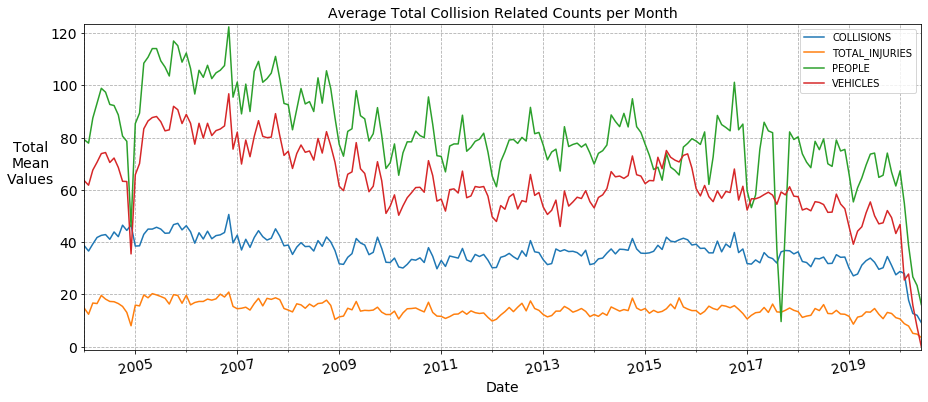

In [6]:
# compare monthly average values over time

df_mean = df_sum.resample("MS").mean().round(decimals=1)
df_mean.drop(columns=["FATALITIES", "SERIOUS_INJURIES", "MINOR_INJURIES"]).plot(figsize=(15,6));
plt.xlabel("Date", size=14);
plt.ylabel("Total\nMean\nValues", size=14, rotation="horizontal", labelpad=20);
plt.xticks(rotation=10, ha="center", size=14);
plt.yticks(size=14);
plt.title('Average Total Collision Related Counts per Month', size=14);
plt.margins(0.01);
plt.grid(which="both", linestyle="--")
plt.show();

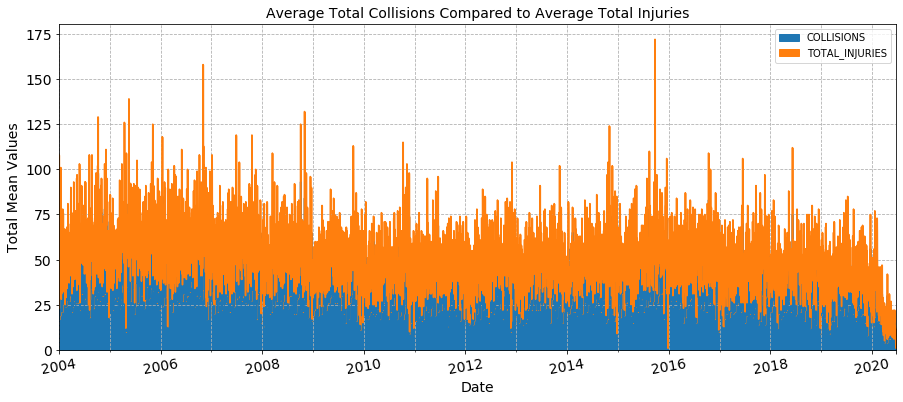

In [7]:
df_sum.drop(columns=["VEHICLES", "PEOPLE", "FATALITIES",
                     "SERIOUS_INJURIES", "MINOR_INJURIES"]).plot.area(figsize=(15,6));
plt.xlabel("Date", size=14);
plt.ylabel("Total Mean Values", size=14);
plt.xticks(rotation=10, ha="center", size=14);
plt.yticks(size=14);
plt.title('Average Total Collisions Compared to Average Total Injuries', size=14);
plt.grid(which="both", linestyle="--");
plt.show();

Instead of looking collisions at the day or month level, we could look at the trends by the hour. The plot below looks at the average number of collisions between 0 (midnight) to 23:59 (11:59 pm) across the days of the week.

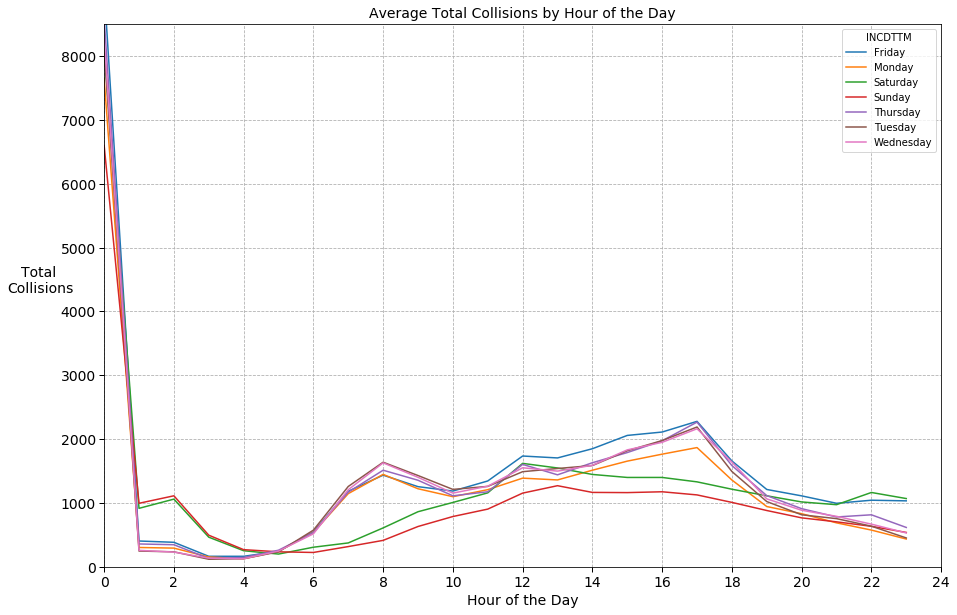

In [8]:

df.groupby([df["INCDTTM"].dt.hour,
            df["INCDTTM"].dt.day_name()])["OBJECTID"].count().unstack().plot(figsize=(15,10), 
                                                                             xticks=(list(range(0,25,2))),
                                                                             ylim=(0,8500),
                                                                             grid=True);
plt.xlabel("Hour of the Day", size=14);
plt.ylabel("Total \nCollisions", size=14, rotation="horizontal", labelpad=20);
plt.title('Average Total Collisions by Hour of the Day', size=14);
plt.tick_params(which="major", width=1, length=5);
plt.grid(which="both", linestyle="--");

Here's a similar plot, but comparing the average total number of injuries sustained each hour across each weekday. This plot also restricts the x-axis to traditional working hours, 8 am - 6 pm, since including midnight made it difficult to read the skewed plot. 

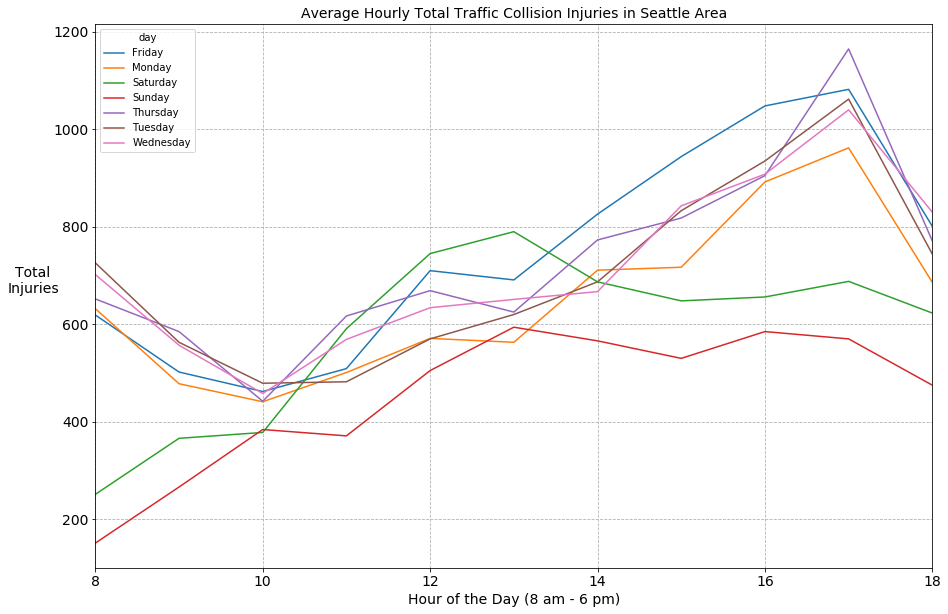

In [9]:
df_hr = pd.DataFrame({"hour": df["INCDTTM"].dt.hour,
                      "day": df["INCDTTM"].dt.day_name(),
                      "total_injuries": df["TOTAL_INJURIES"]})
df_hr.head()
df_hr.shape
df_hr = df_hr[df_hr["hour"] >= 8]
df_hr = df_hr[df_hr["hour"] <= 18]
df_hr.groupby(["hour", "day"])["total_injuries"].sum().unstack().plot(figsize=(15,10));
plt.xlabel("Hour of the Day (8 am - 6 pm)", size=14);
plt.ylabel("Total\nInjuries", size=14, rotation="horizontal", labelpad=20);
plt.title('Average Hourly Total Traffic Collision Injuries in Seattle Area', size=14);
plt.grid(which="both", linestyle="--");

## 5. Identify target variable - what are you trying to forecast for? 

##### In this case we will use the number of accidents aggregated daily

In [10]:
#convert the date to datetime format (ISO 8601 YYYY-MM-DD format)
df['INCDATE'] = df['INCDATE'].astype('datetime64') 
df.head(3)

df_agg = df.groupby(['INCDATE'])['INCKEY'].agg({'INCKEY':'count'})\
           .rename(columns={'INCKEY': 'SUM_INC'}).reset_index()
df_agg.set_index('INCDATE')
#sort the values by day
df_agg = df_agg.sort_values(by=['INCDATE'])
df_agg.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,TOTAL_INJURIES
0,-122.316780,47.608643,1,331585,333085,3847763,Unmatched,Block,NaN,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,,NaN,2,Injury Collision,NaN,3,0,0,0,1,0,0,2020-05-23,2020-05-23 00:00:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,1
1,-122.322951,47.686787,2,27200,27200,527086,Matched,Intersection,24392.0,5TH AVE NE AND NE 80TH ST,NaN,NaN,1,Property Damage Only Collision,Angles,0,0,0,2,0,0,0,2004-02-04,2004-02-04 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4035006.0,NaN,10,Entering at angle,0,0,N,0
2,-122.347162,47.613758,3,1107,1107,3562735,Matched,Block,NaN,1ST AVE BETWEEN BELL ST AND BATTERY ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013-03-28,2013-03-28 22:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Unknown,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N,0


,SUM_INC
INCDATE,
2003-10-06,1
2004-01-01,30
2004-01-02,80
2004-01-03,21
2004-01-04,17
...,...
2020-06-17,8
2020-06-18,4
2020-06-19,4


,INCDATE,SUM_INC
0,2003-10-06,1
1,2004-01-01,30
2,2004-01-02,80
3,2004-01-03,21
4,2004-01-04,17


It is highly unlikely that we do not have collisions for the months of November and December of 2003. 
<br>From this I suggest we begin our dataset at January 2004

In [11]:
df_agg = df_agg[df_agg['INCDATE']>=(pd.to_datetime('2004-01-01'))]
df_agg.head()

,INCDATE,SUM_INC
1,2004-01-01,30
2,2004-01-02,80
3,2004-01-03,21
4,2004-01-04,17
5,2004-01-05,27


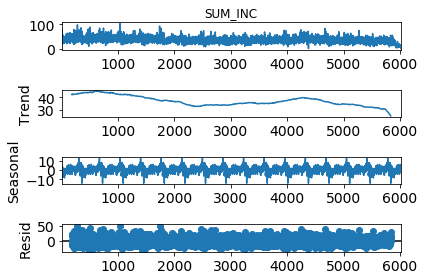

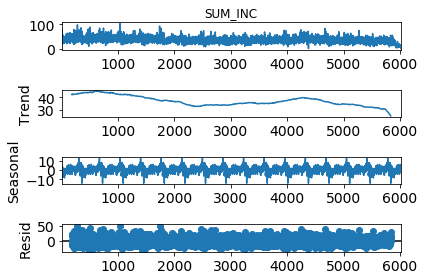

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
s=sm.tsa.seasonal_decompose(df_agg.SUM_INC,period=365)
s.plot()
pyplot.show()

Trend usually can tell us what our eyes might have already picked up from plotting the data on a less granular basis - is there a change in the overall "direction" of our data over time? If yes, then the data is most likely not stationary. 
<br> What does a stationary dataset even mean?
 - constant mean
 - constant variance
 - variance that is not time dependent
 
Eyeballing the data isn't always the best way to determine if a time series is stationary. We will perform an augmented Dickey-Fuller test.

##### What is an augmented Dickey-Fuller test? 
An augmented Dickey-Fuller (ADF) test is a test to see if a time series has a unit root. A unit root indicates that the time series is stationary - A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are not dependent on time. An upwards or downwards trend usually indicates that the time series is time dependent. 
<br> **Test H0: Time Series is non-stationary. We want to REJECT the null hypothesis for this test.**
<br> Test H1: Time series is stationary. <br>
The ADF test statistic is a negative number - the more negative it is, the stronger the rejection of the null hypothesis. 

ADF Statistic: -2.889227
p-value: 0.046615
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


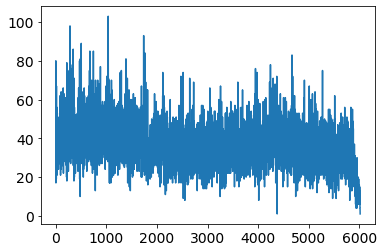

In [15]:
## Let's perform a test to see if the time series is stationary. 
## WE'll perform an augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
X = df_agg.SUM_INC
# X = np.log10(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
pyplot.plot(X)
pyplot.show()

We can see that our statistic value is greater than the values at any confidence levels. 
This suggests that we fail to reject the null hypothesis with a significance level of less than 10% - really any significant level. <br>
We fail to reject the null hypothesis, so we fail to say the time series has a time independent structure. 
<br>
<br>
We have a choice now - we can try to transform the data using log or differencing transform to see if we are able to achieve a time independent structure, or we can move towards multivariate forecasting methods. Univariate forecasting methods, specifically ARIMA methods, rely on a foundational assumption that the time series is stationary.

## Autocorrelation and Differencing 
The correlation of time series observations to past observations is autocorrelation (also known as serial correlation). 
<br>
The partial autocorrelation is the same as an autocorrelation, but it attempts to remove the linear relationship between time series observations. 
<br>
Differencing is computing the differences between consecutive observations. It is an attempt at stabilizing the variance of the time series. 


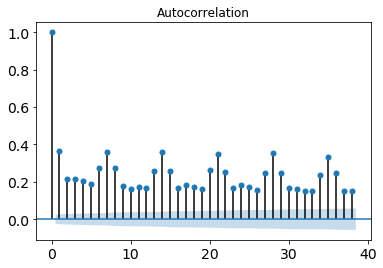

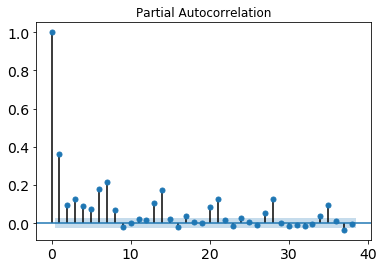

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(X);
plot_pacf(X);

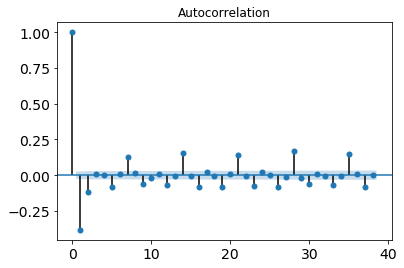

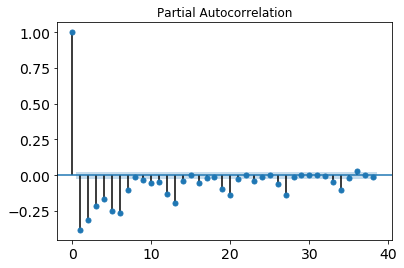

In [19]:
LAG_DF = df_agg.copy()
LAG_DF['LAG1'] = LAG_DF['SUM_INC'].shift(1)
# LAG_DF['LAG2'] = LAG_DF['LAG1'].shift(2)
LAG_DF = LAG_DF.dropna()
LAG_DF['LAG_1_DIFF'] = (LAG_DF['SUM_INC'] - LAG_DF['LAG1'])
#reassign that X
X = LAG_DF.LAG_1_DIFF
plot_acf(X);
plot_pacf(X);

**With this transformation let's try the ADF test again**

ADF Statistic: -22.546589
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


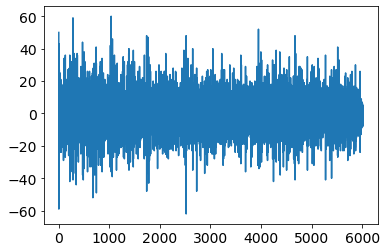

In [20]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
pyplot.plot(X)
pyplot.show()

**Captain, we have a stationary time series**<br>
*Our ADF statistics is less than all of our critical values*

## Auto ARIMA
ARIMA Stands for **AutoRegressive Integrated Moving Average**. 
ARIMA models are used for forecasting. Univariate ARIMA models are usually implemented as a first-step forecasting-model. The Univariate model only takes in to account time and no external factors. They can be implemented in Python using pyramid-arima library. In an ARIMA Model you have 3 main parameters, namely, **p, d and q**.

p - models the auto-regressive component. This incorporates the past value in to the model. It refers to the # lags that can be used as predictors.

d - models the integrated part of the model. This parameter is used to indicate how much differencing you would want to apply to your time series to make it stationary. 

q - associated with the moving-average part of the model. It refers to the # lagged forecast errrors that can be used as predictors.

If your time series has a seasonal component, you would have to add seasonal terms in it (SARIMA). 

There are multiple ways to initialize values for p,d,q for Auto-ARIMA. You can use your domain expertise, past knowledge to select. The "auto-arima"  function in the pyramid-arima library gives an option to do grid-search over multiple values of p,d and q that you can use a performance metric to evaluate. One such metric to evaluate is AIC (Akaike Information Criteria) which takes in to account the complexity of the model to determine fit.


Note of Caution: Our data in the current form is not stationary so this might not be the ideal way to proceed analysing the data. The following is to demonstrate how to implement Auto-ARIMA using Python on a time-series. 

In [21]:
import pmdarima as pm
x = np.array(LAG_DF.LAG_1_DIFF)
y = x.astype(np.float)

In [24]:
# Stepwise ARIMA Model to find the best value of p,d,q based on AIC
stepwise_model = pm.auto_arima(y, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=53449.343, BIC=53462.747, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=50821.385, BIC=50841.491, Fit time=0.072 seconds
Fit ARIMA: order=(0, 1, 1); AIC=47347.715, BIC=47367.821, Fit time=1.360 seconds
Fit ARIMA: order=(0, 1, 2); AIC=44463.918, BIC=44490.727, Fit time=5.757 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=44290.968, BIC=44324.478, Fit time=10.991 seconds
Total fit time: 19.670 seconds
44290.967509070215


In [25]:
# Train-Test Split (2004-2015 : Train Data, 2015-2018: Test Data)
df_aggtrain = df_agg[df_agg['INCDATE']<(pd.to_datetime('2016-01-01'))]
df_aggtest = df_agg[df_agg['INCDATE']>=(pd.to_datetime('2018-01-01'))]

xtrain = np.array(df_aggtrain['SUM_INC'])
ytrain = xtrain.astype(np.float)

xtest = np.array(df_aggtest['SUM_INC'])
ytest = xtest.astype(np.float)

In [34]:
len(ytest)

903

In [35]:
# Train the Model
stepwise_model.fit(ytrain)
# Evaluate
# len(ytest) # n = 1,634
future_forecast = stepwise_model.predict(n_periods=len(ytest))
future_forecast # array of predictions for future timeperiods
forecastdf = pd.DataFrame(future_forecast,index = df_aggtest.index,columns=["Prediction"])
forecastdf.head()

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

array([38.37605544, 39.09412554, 38.95205249, 38.95215923, 38.95226597,
       38.95237272, 38.95247946, 38.9525862 , 38.95269294, 38.95279968,
       38.95290643, 38.95301317, 38.95311991, 38.95322665, 38.95333339,
       38.95344014, 38.95354688, 38.95365362, 38.95376036, 38.9538671 ,
       38.95397384, 38.95408059, 38.95418733, 38.95429407, 38.95440081,
       38.95450755, 38.9546143 , 38.95472104, 38.95482778, 38.95493452,
       38.95504126, 38.955148  , 38.95525475, 38.95536149, 38.95546823,
       38.95557497, 38.95568171, 38.95578846, 38.9558952 , 38.95600194,
       38.95610868, 38.95621542, 38.95632217, 38.95642891, 38.95653565,
       38.95664239, 38.95674913, 38.95685587, 38.95696262, 38.95706936,
       38.9571761 , 38.95728284, 38.95738958, 38.95749633, 38.95760307,
       38.95770981, 38.95781655, 38.95792329, 38.95803003, 38.95813678,
       38.95824352, 38.95835026, 38.958457  , 38.95856374, 38.95867049,
       38.95877723, 38.95888397, 38.95899071, 38.95909745, 38.95

,Prediction
5115,38.376055
5116,39.094126
5117,38.952052
5118,38.952159
5119,38.952266


In [36]:
a = pd.concat([forecastdf,df_aggtest],axis=1)
a.head()

,Prediction,INCDATE,SUM_INC
5115,38.376055,2018-01-01,29
5116,39.094126,2018-01-02,32
5117,38.952052,2018-01-03,43
5118,38.952159,2018-01-04,32
5119,38.952266,2018-01-05,36


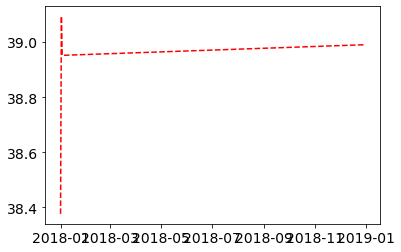

In [40]:
# PLOTTING ONLY FOR 2018
a2016 = a[a['INCDATE']<(pd.to_datetime('2019-01-01'))]
# plt.plot(a2016['INCDATE'], a2016['Prediction'], 'r--',  a2016['INCDATE'], a2016['SUM_INC'], 'bs')
plt.plot(a2016['INCDATE'], a2016['Prediction'], 'r--')
plt.show()

You can see from the above that the model does not predict future points very well. You could do multiple things to address it:

1. Try using log-scale instead of whole counts
2. Increase the time-intervals (weekly or monthly)
3. In the model fit, I limited the value of p & q to not go beyond 3. You can relax that to see if that improves model fit. 

In [41]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

In [42]:
# Train-Test Split (2004-2015 : Train Data, 2015-2018: Test Data)
df_train = df_agg[df_agg['INCDATE']<(pd.to_datetime('2016-01-01'))]
df_test = df_agg[df_agg['INCDATE']>=(pd.to_datetime('2018-01-01'))]

xtrain = np.array(df_train['SUM_INC'])
ytrain = xtrain.astype(np.float)

xtest = np.array(df_test['SUM_INC'])
ytest = xtest.astype(np.float)

In [48]:
dataset = df_train
dataset = dataset.sort_values(by=['INCDATE'])

dataset = dataset.rename(columns={'INCDATE': 'ds', 'SUM_INC': 'y'})
dataset_model = Prophet(interval_width=0.95,seasonality_mode='multiplicative')
dataset_model.fit(dataset)

dataset_forecast = dataset_model.make_future_dataframe(periods=365, freq='d')
dataset_forecast = dataset_model.predict(dataset_forecast)

dataset_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
4743,2016-12-26,35.742108,18.431006,52.497716
4744,2016-12-27,38.427073,22.473385,55.508697
4745,2016-12-28,38.845861,21.454357,54.983984
4746,2016-12-29,38.699501,20.710480,55.634523
4747,2016-12-30,43.234055,26.401284,60.709845


<Figure size 1296x432 with 0 Axes>

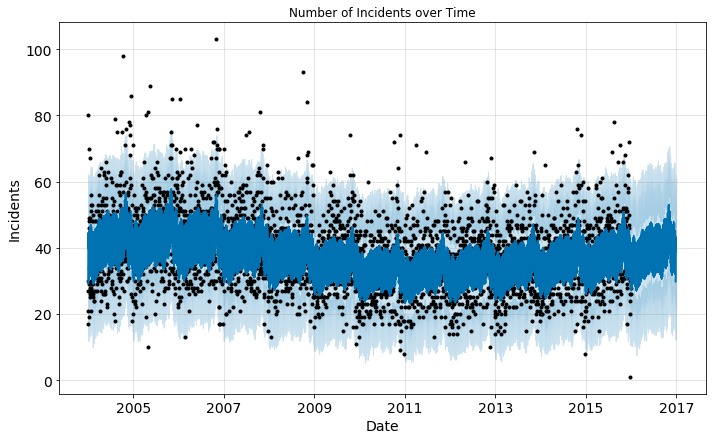

In [49]:
plt.figure(figsize=(18, 6))
dataset_model.plot(dataset_forecast, xlabel = 'Date', ylabel = 'Incidents', uncertainty=True)
plt.title('Number of Incidents over Time');